# Исследование рынка заведений общественного питания Москвы

В рамках проекта проводится исследование рынка общественного питания в Москве.

Цель - открытие небольшого кафе.

Уникальность кафе - обслуживание гостей роботами.

## Загрузка данных и подготовка к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
def first_look(df):
    '''Функция для просмотра основной информации о таблице'''
    print('Первые 5 строк таблицы:')
    display(df.head())
    print('Информация о таблице:')
    df.info()
    display(df.describe())
    print('Количество строк и столбцов:')
    print(df.shape)
    print('Количество пропусков:')
    if df.isna().sum().sum()==0:
        print('пропусков нет')
    else:
        print(df.isna().sum())
    print('Количество дубликатов:')
    if df.duplicated().sum()==0:
        print('дубликатов нет')
    else:
        print(df.duplicated().sum())

In [4]:
# посмотрим информацию о таблице
first_look(rest_data)

Первые 5 строк таблицы:


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


Количество строк и столбцов:
(15366, 6)
Количество пропусков:
пропусков нет
Количество дубликатов:
дубликатов нет


In [5]:
# посмотрим количество уникальных названий заведений
rest_data['object_name'].nunique()

10393

In [6]:
# приведем все названия к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()

# проверим, изменилось ли количество уникальных названий
rest_data['object_name'].nunique()

9924

In [7]:
# заменим все буквы "ё" на "е" в адресах
# rest_data['address'] = [x.replace('ё', 'е') for x in rest_data['address']]
rest_data['address']=rest_data['address'].str.replace('ё', 'е')

In [8]:
# просмотрим, есть ли у нас дубликаты по основным столбцам - название, тип заведения, адрес и количество мест
rest_data[rest_data[['object_name','object_type','address', 'number']].duplicated()].sort_values(by='address')

,id,object_name,chain,object_type,address,number
5185,107442,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",20
5190,107480,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",5
5188,107466,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",5
5186,107574,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",10
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
...,...,...,...,...,...,...
11066,183855,каменев василий владимирович,нет,кафе,"город Москва, улица Сущевский Вал, дом 5, стро...",1
14223,205506,кафе,нет,кафе,"город Москва, улица Трофимова, владение 36",40
3397,71896,буфет «коникс-школьник»,нет,буфет,"город Москва, улица Удальцова, дом 21",100
6423,19759,бар,нет,бар,"город Москва, улица Улофа Пальме, дом 5, строе...",10


Обанружено 85 строк, в которых совпадает название заведения, его тип, адрес и количество посадочных мест. Сложно сказать, являются ли они неявными дубликатами или нет - так, по адресу "город Москва, 1-я Останкинская улица, дом 55" находится торговый центр, в котором действительно может быть много кафе с одинаковым количеством мест, а у Бауманки много различных столовых и буфетов, которые могут находиться в одном корпусе. С другой стороны, вряд ли в одном здании будет находиться два заведения "Каменев Василий Владимирович", потому это, скорее всего, дубликат. В идеале стоит проверить каждую строку, однако тратить на это время считаю нецелесообразным, потому посчитаем все эти строки дубликатами и удалим, тем более, что их немного - всего лишь около 0.5%.

In [9]:
# удалим дубликаты
rest_data = rest_data.drop_duplicates(subset=['object_name','object_type','address', 'number']).reset_index(drop=True)

In [10]:
# просмотрим, как изменилась таблица
first_look(rest_data)

Первые 5 строк таблицы:


,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15281 entries, 0 to 15280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 716.4+ KB


,id,number
count,15281.000000,15281.000000
mean,119500.243440,59.788234
std,73044.123929,74.843042
min,838.000000,0.000000
25%,28493.000000,14.000000
50%,144799.000000,40.000000
75%,184090.000000,80.000000
max,223439.000000,1700.000000


Количество строк и столбцов:
(15281, 6)
Количество пропусков:
пропусков нет
Количество дубликатов:
дубликатов нет


In [11]:
# просмотрим уникальные значения типов заведений
rest_data['object_type'].value_counts()

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1897
бар                                   855
буфет                                 576
кафетерий                             395
закусочная                            348
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

count    15281.000000
mean        59.788234
std         74.843042
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64


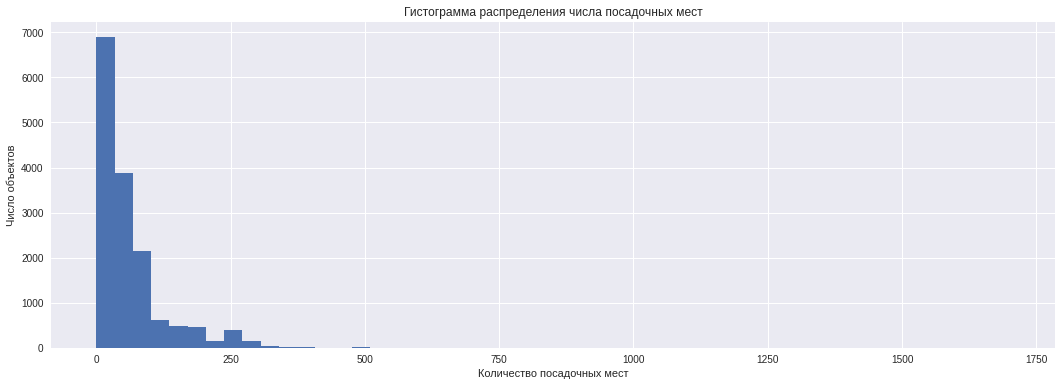

In [12]:
# просмотрим распределение мест
print(rest_data['number'].describe())

# построение графика
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6)) 
    rest_data['number'].hist(bins=50)
    plt.title('Гистограмма распределения числа посадочных мест')
    plt.ylabel('Число объектов')
    plt.xlabel('Количество посадочных мест')
    plt.show()

Очень много заведений без посадочных мест. Посмотрим, что это за заведения такие.

In [13]:
# просмотрим, в каких заведениях обычно не бывает посадочных мест
(rest_data.query('number == 0').value_counts('object_type')/rest_data.value_counts('object_type'))\
                            .sort_values(ascending=False).to_frame().style.format('{:.2%}')

,0
object_type,
магазин (отдел кулинарии),53.11%
закусочная,52.01%
предприятие быстрого обслуживания,36.37%
кафетерий,28.10%
буфет,11.11%
кафе,5.04%
бар,3.27%
ресторан,1.93%
столовая,0.74%


Отсутствие мест у магазинов, закусочных и предприятий быстрого обслуживания выглядит вполне логично.

Ожидаемо, тут есть предприятия быстрого обслуживания, закусочные, отделы кулинарии - тут отсутствие мест выглядит вполне логичным и оправданным. А вот отсутствие мест в кафе и тем более ресторнах выглядит как ошибка, однако возможности восстановить значения у нас нет.

**Выводы:**
- Были загружены данные о заведениях Москвы;
- Пропусков и явных дубликатов не обнаружено;
- Названия приведены к нижнему регистру, заменены буквы "ё" на "е";
- Обнаружено некоторые количество возможнных неявных дубликатов, которые были удалены;
- Обнаружены заведения без посадочных мест; часть из них, скорее всего, работает на вынос/доставку, а у части это, скорее всего, является ошибкой. Возможности восстановить информацию о количестве мест нет.

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству

In [14]:
# для красивого отображения на графиках добавим переносы на новую строку и начнем с заглавной буквы
rest_data['object_type'] = [x.replace(' ', '\n').capitalize() for x in rest_data['object_type']]

# сформируем сводную таблицу для дальнейшего построения графика
objects_by_type = rest_data.groupby('object_type')['id'].agg('count').sort_values(ascending=False).reset_index()
objects_by_type.columns = ['object_type','count']

In [15]:
# настройки графиков
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_96/5145156.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


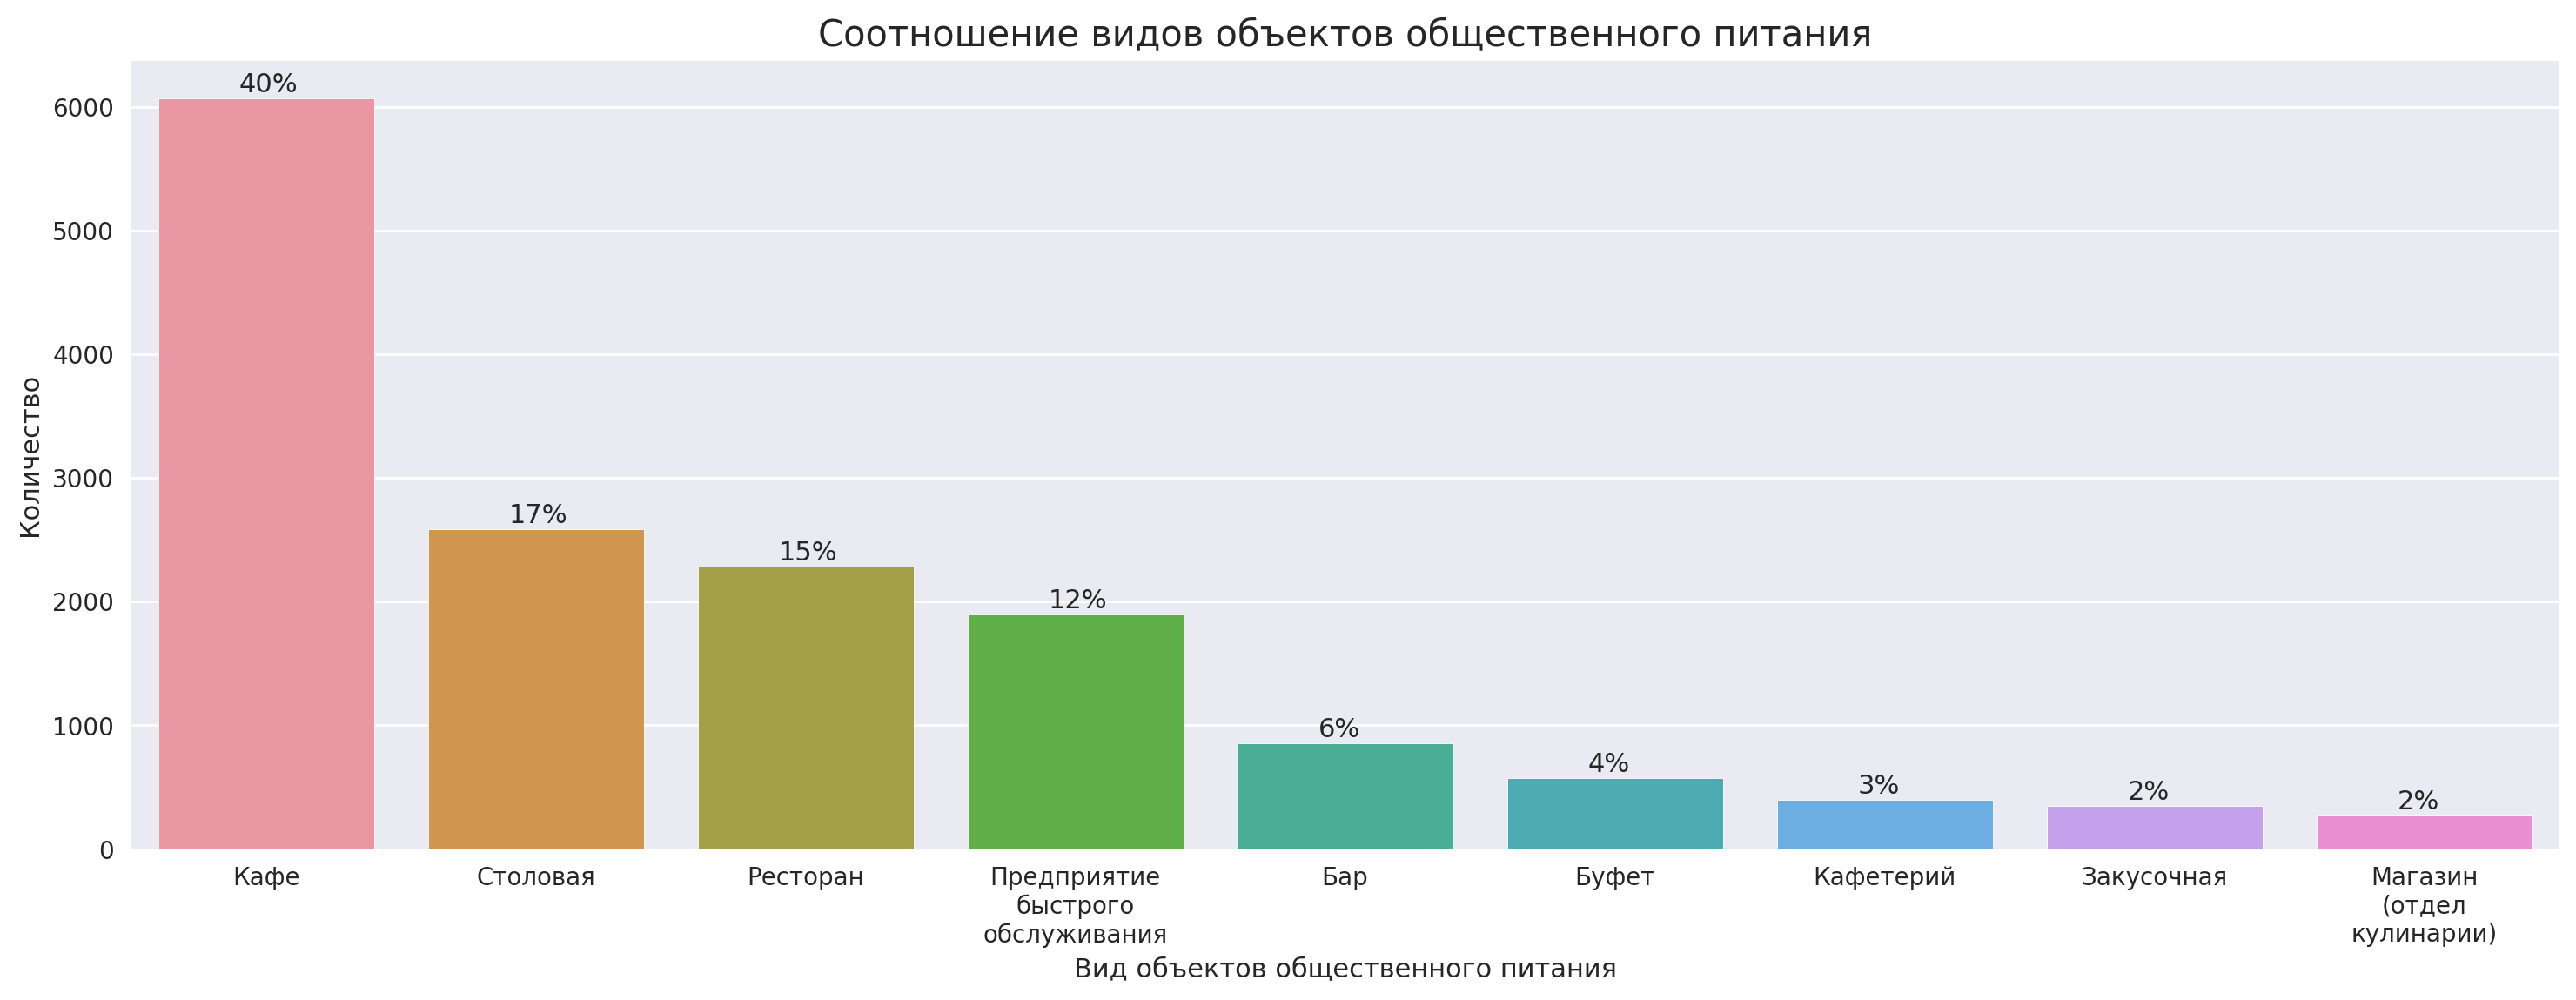

In [16]:
# построение графика
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))  
    ax = sns.barplot(x='object_type', y='count', data=objects_by_type)

# добавим на график подписи процентов
total = len(rest_data)
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 50
    ax.annotate(percentage, (x, y), size = 11)
    
plt.ylabel('Количество')
plt.xlabel('Вид объектов общественного питания')
plt.title('Cоотношение видов объектов общественного питания', fontsize=15)
plt.show()

Самые распространенные виды объекта общественного питания - это кафе (40%), столовая (17%) и ресторан (15%). Наименее распространенные - магазины с отделом кулинарии, закусочные и кафетерии (около 2% каждый).

### Соотношение сетевых и несетевых заведений по количеству

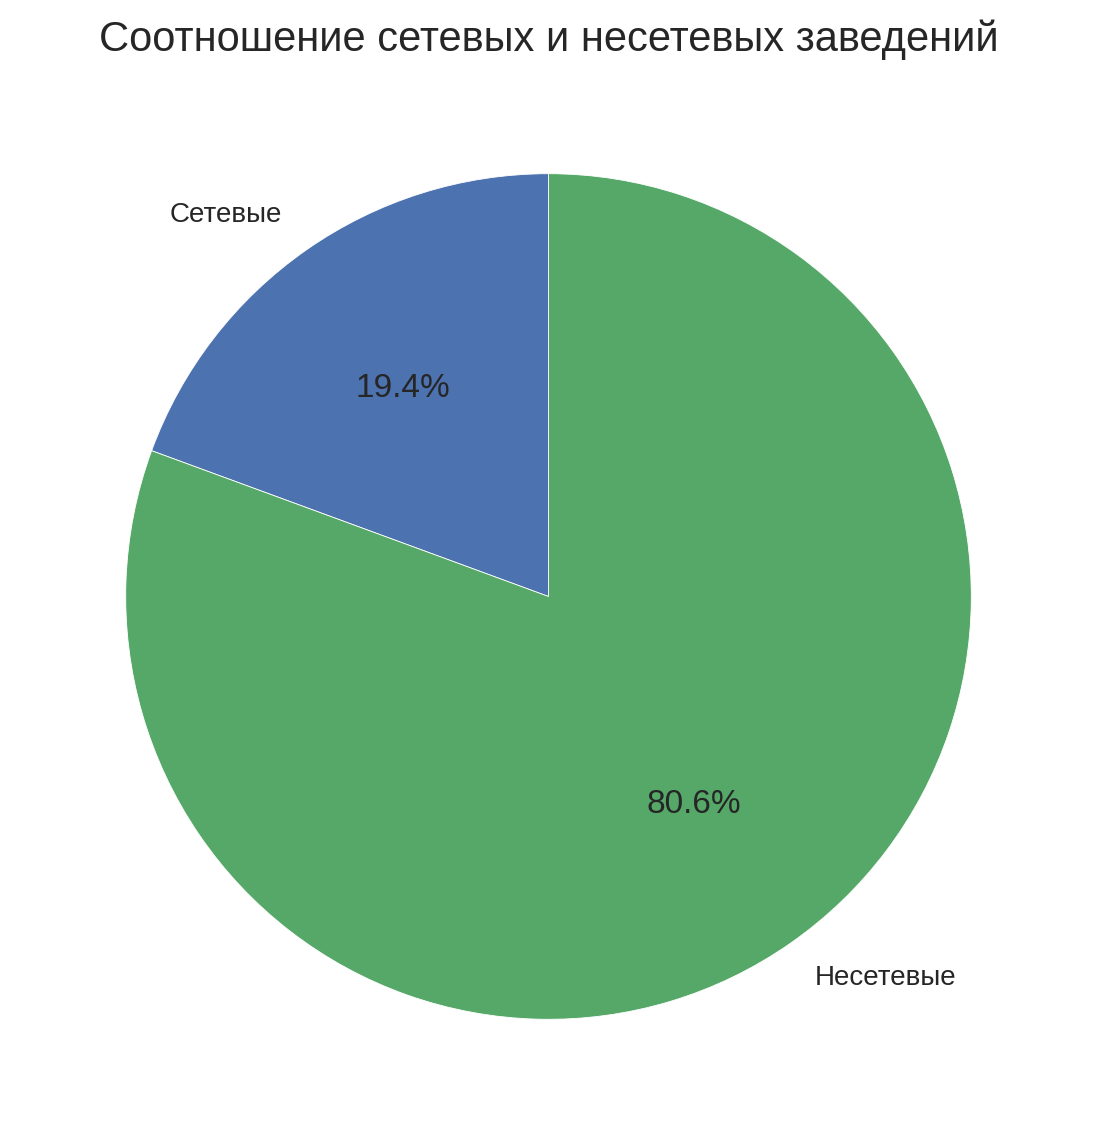

In [17]:
# сформируем сводную таблицу для дальнейшего построения графика
objects_chain = rest_data.groupby('chain')['id'].agg('count').sort_values().reset_index()

# построение графика
with plt.style.context('seaborn'):
    labels_chain=['Сетевые', 'Несетевые']
    plt.figure(figsize=(10,7))
    plt.pie(objects_chain['id'], labels=labels_chain, autopct='%1.1f%%', startangle=90)
    plt.title('Cоотношение сетевых и несетевых заведений', fontsize=15)
    plt.show()

Большая часть заведений (около 80%) - несетевые.

### Виды объектов общественного питания, для которого характерно сетевое распространение

In [18]:
# сформируем сводную таблицу для дальнейшего построения графика
objects_by_type_chain = rest_data.groupby(['object_type', 'chain'])['id'].agg('count').reset_index()

# добавим столбец с суммой по типу объекта
objects_by_type_chain = objects_by_type_chain.merge(
    rest_data.groupby('object_type')['id'].agg('count').sort_values(ascending=False).reset_index(),
    on='object_type', how='left')

# переименование стоблцов
objects_by_type_chain.columns = ['object_type','chain','number','sum']

# добавим столбец с долей по типу объекта
objects_by_type_chain['share'] = objects_by_type_chain['number'] / objects_by_type_chain['sum'] *100

# применим сортировку
objects_by_type_chain= objects_by_type_chain.sort_values(by=['chain','share'], ascending=False)

objects_by_type_chain

,object_type,chain,number,sum,share
17,Столовая,нет,2581,2584,99.883901
3,Буфет,нет,565,576,98.090278
1,Бар,нет,818,855,95.672515
9,Кафетерий,нет,343,395,86.835443
5,Закусочная,нет,292,348,83.908046
7,Кафе,нет,4675,6071,77.005436
15,Ресторан,нет,1739,2282,76.205083
11,Магазин\n(отдел\nкулинарии),нет,195,273,71.428571
13,Предприятие\nбыстрого\nобслуживания,нет,1109,1897,58.460727
12,Предприятие\nбыстрого\nобслуживания,да,788,1897,41.539273


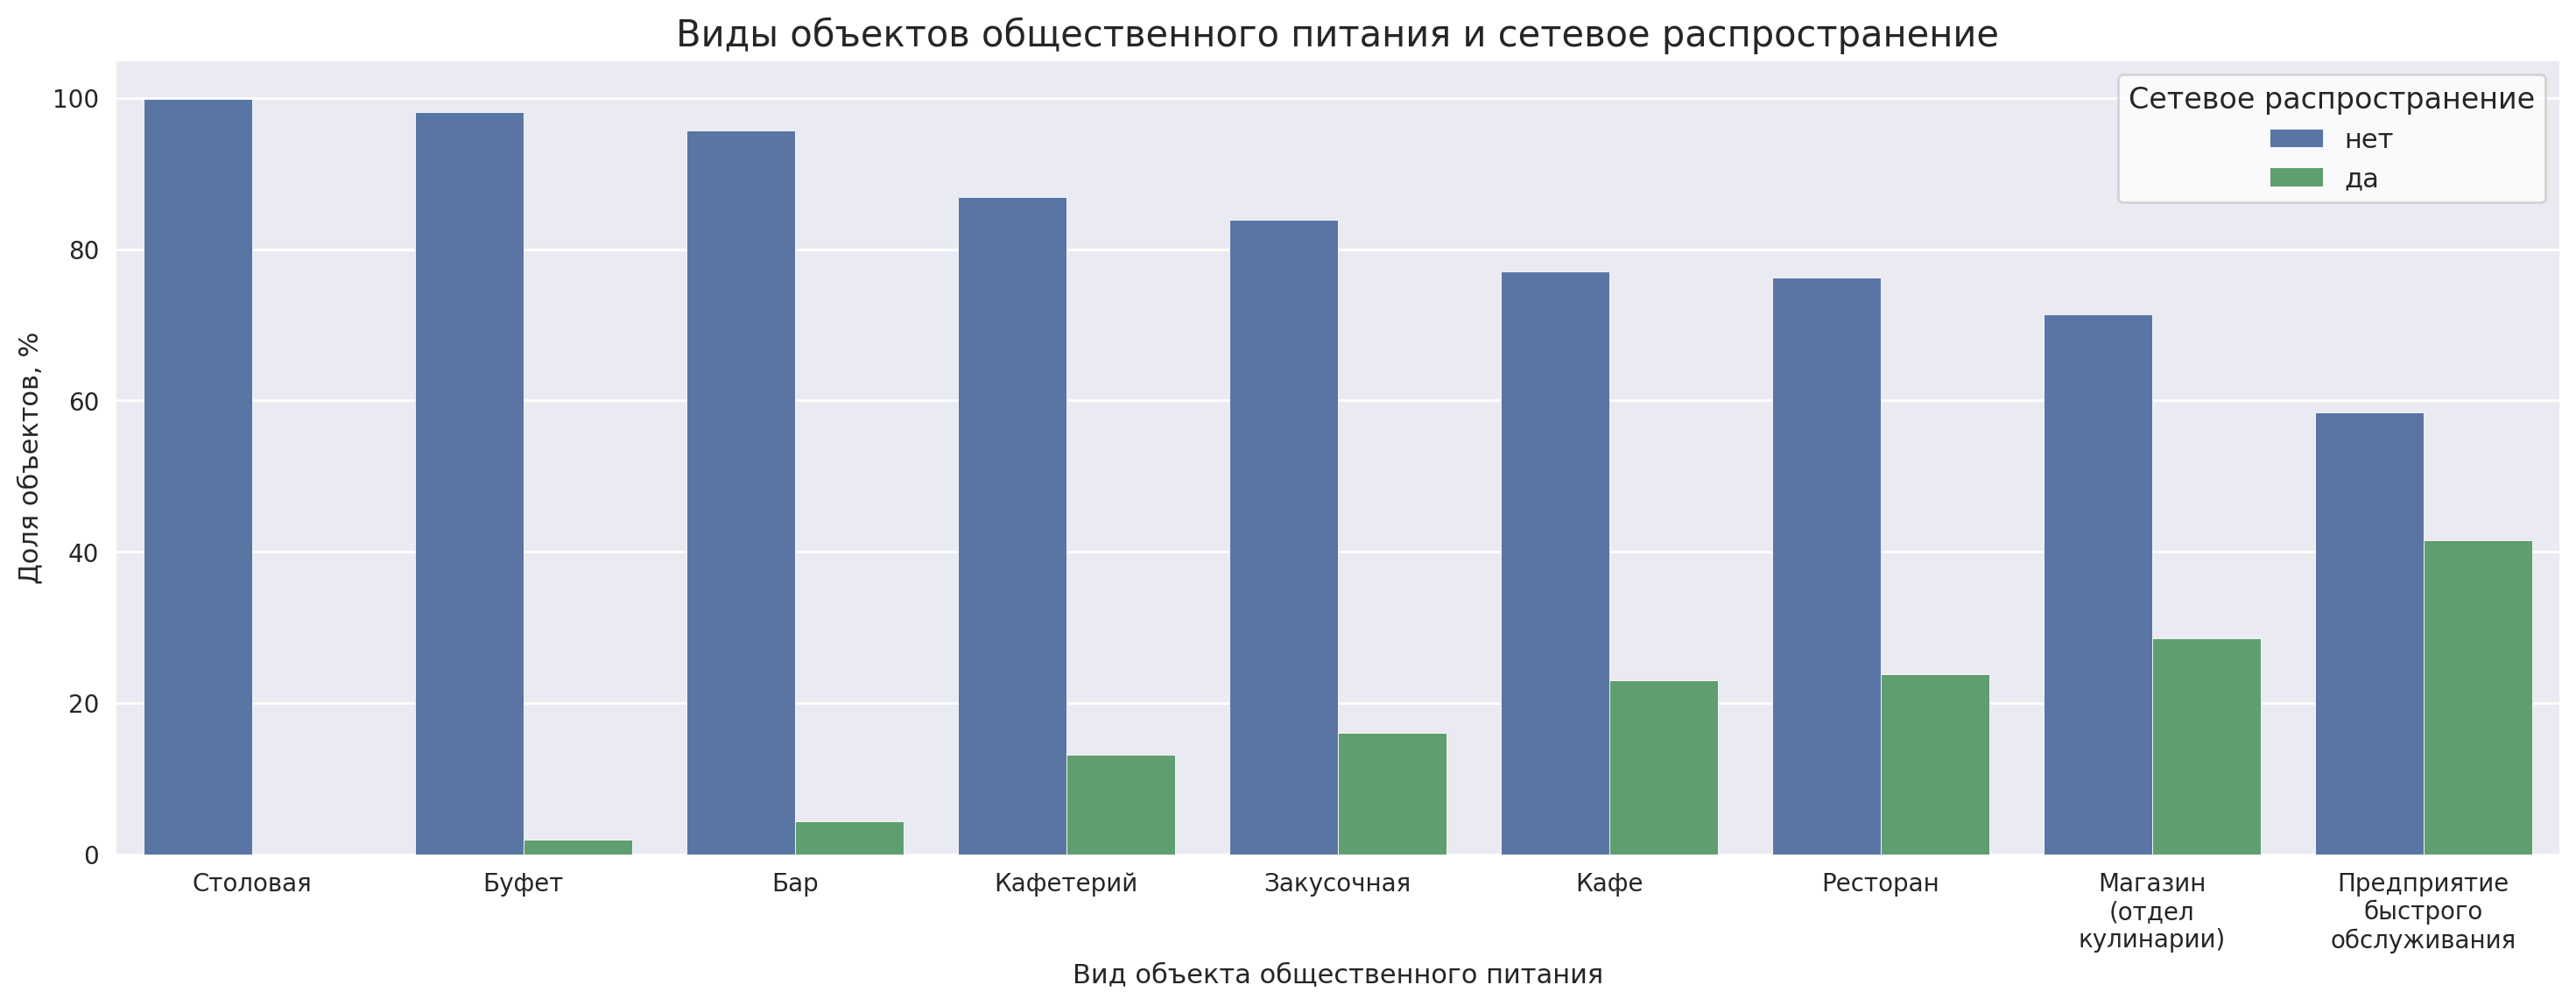

In [19]:
# построение графика
plt.figure(figsize=(18,6))
with plt.style.context('seaborn'):
    plot = sns.barplot(x='object_type', y='share', hue='chain', data=objects_by_type_chain)
      
plt.title('Виды объектов общественного питания и сетевое распространение', fontsize=15)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Доля объектов, %')
plt.legend(title ='Сетевое распространение')
plt.show()

In [20]:
# Код ревьюера

rest_data.groupby('object_type').agg({'chain' : lambda x : (x == 'да').mean()})

,chain
object_type,
Бар,0.043275
Буфет,0.019097
Закусочная,0.160920
Кафе,0.229946
Кафетерий,0.131646
Магазин\n(отдел\nкулинарии),0.285714
Предприятие\nбыстрого\nобслуживания,0.415393
Ресторан,0.237949
Столовая,0.001161


По графику видно, что сетевое распространение более всего характерно для предприятий быстрого обслуживания: доля сетевых объектов составляет около 40% среди заведений данного вида. За ним идут магазины с отделом кулинарии (около 30% - сетевые), а также рестораны и кафе (чуть более 20%). Столовые, буфеты и бары же, в свою очередь, практически всегда имеют несетевую модель распространения.

### Посадочные места в сетевых заведениях

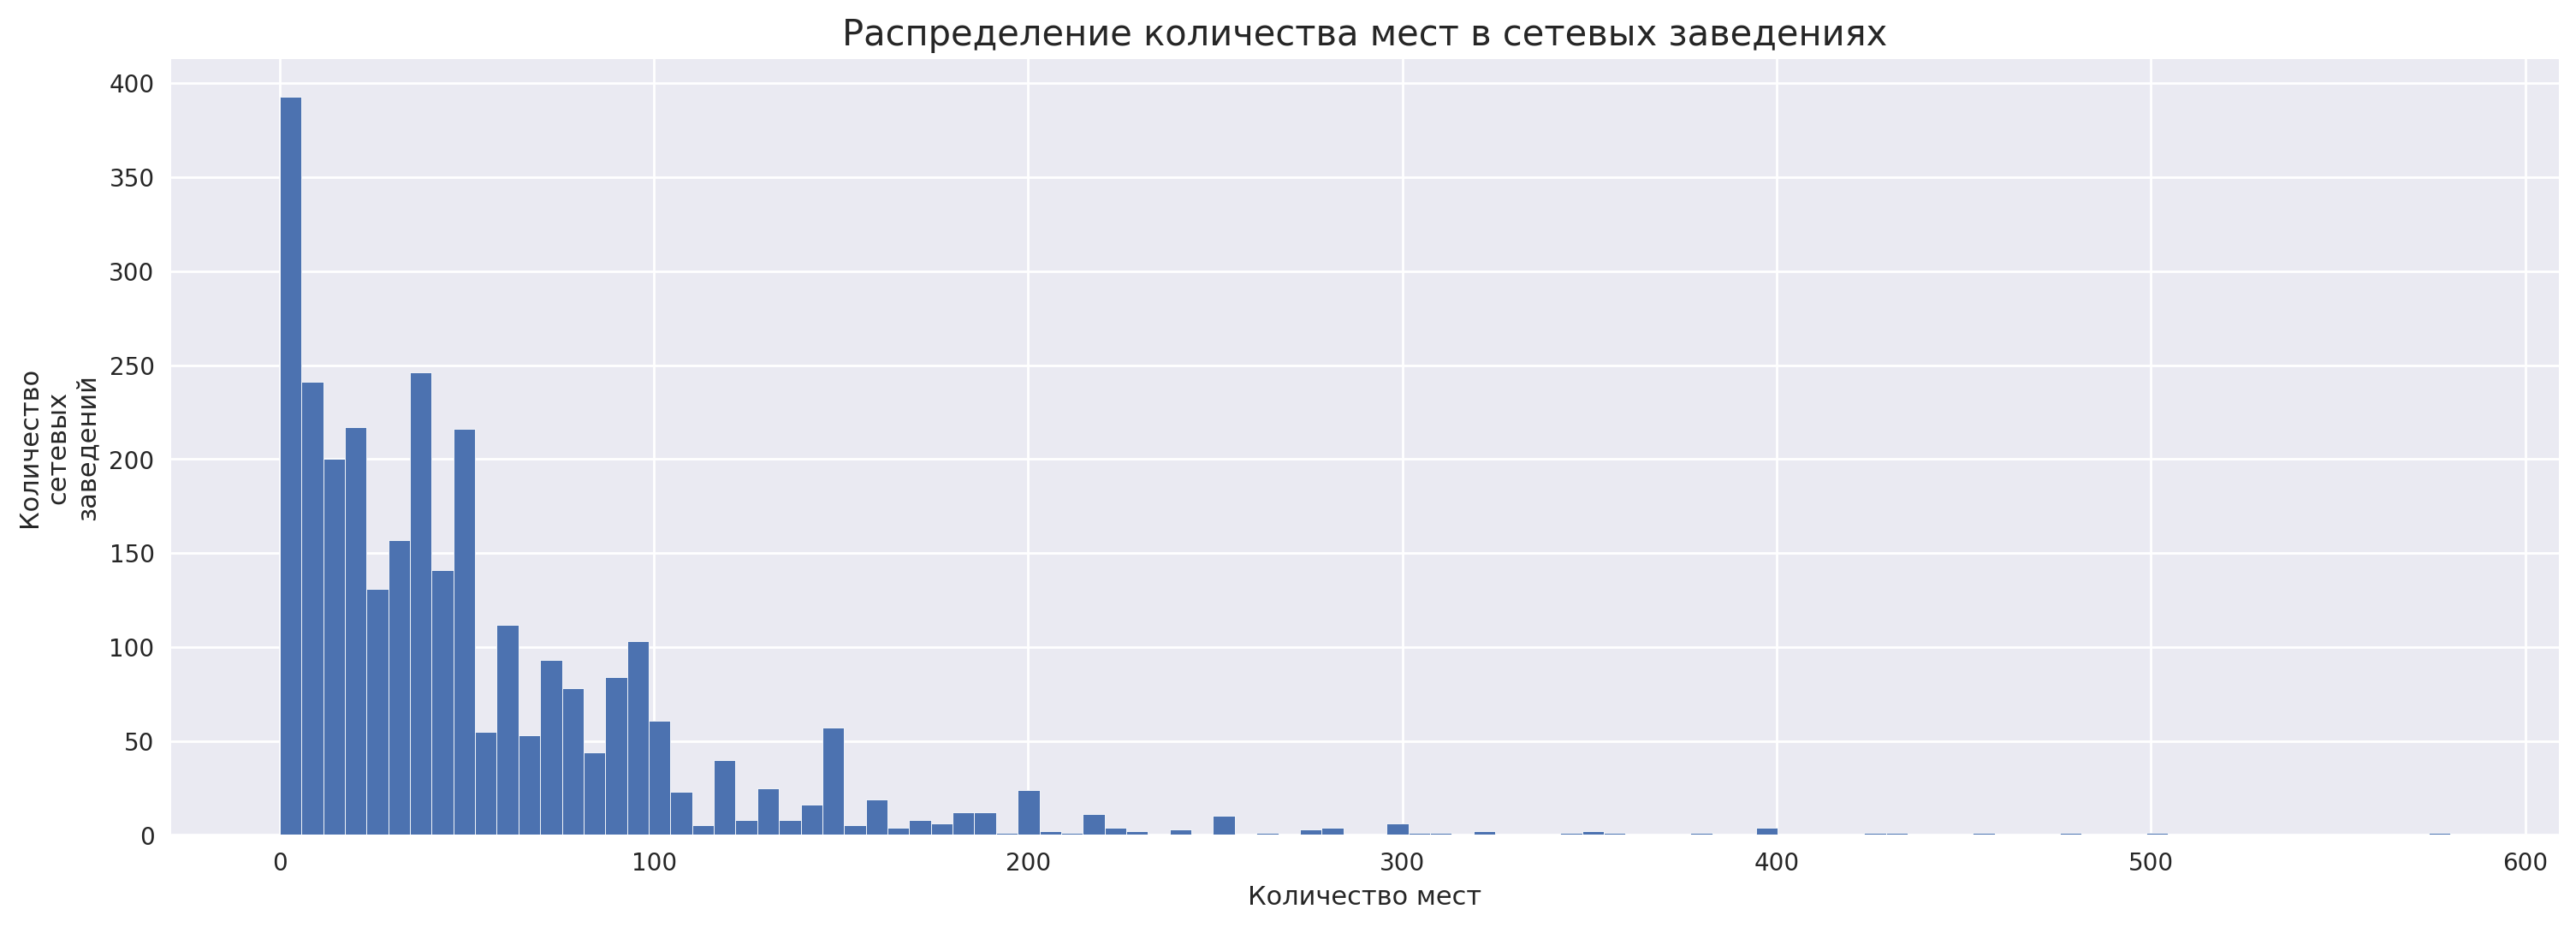

In [21]:
# построение графика
plt.figure(figsize=(18,6))
with plt.style.context('seaborn'):
    rest_data[rest_data['chain']=='да']['number'].hist(bins=100)

plt.title('Распределение количества мест в сетевых заведениях', fontsize=15)
plt.xlabel('Количество мест')
plt.ylabel('Количество\nсетевых\nзаведений')
plt.show()

По гистограмме видно, что большинство сетевых заведений имеет небольшое число посадочных мест. Причем для большого количества заведений количество мест равно 0, то есть, скорее всего, такие заведения работают на вынос и/или доставку.

In [22]:
# посчитаем число заведений без посадочных мест
print('Число заведений без посадочных мест:', len(rest_data[(rest_data['chain']=='да') & (rest_data['number']==0)]))

Число заведений без посадочных мест: 265


In [23]:
objects_chain = rest_data.groupby('object_name').agg({'chain' : lambda x : (x == 'да').sum(), 'number' : 'mean'})\
                                                                            .sort_values('chain', ascending=False)
objects_chain = objects_chain.drop(objects_chain[objects_chain.chain < 2].index)
objects_chain

,chain,number
object_name,,
шоколадница,157,57.126582
kfc,155,55.341935
макдоналдс,150,87.700000
бургер кинг,137,46.649635
теремок,94,25.606383
...,...,...
закусочная kfc,2,98.000000
закусочная «бургер кинг»,2,20.000000
барбекю,2,22.500000


In [24]:
print('Количество сетей с большим числом заведений и большим числом посадочных мест: ', \
      objects_chain.query('chain >= @objects_chain["chain"].median() & number >= @objects_chain["number"].median()').count()[1])
print('Количество сетей с большим числом заведений и небольшим числом посадочных мест: ', \
      objects_chain.query('chain >= @objects_chain["chain"].median() & number < @objects_chain["number"].median()').count()[1])
print('Количество сетей с небольшим числом заведений и большим числом посадочных мест: ', \
      objects_chain.query('chain < @objects_chain["chain"].median() & number >= @objects_chain["number"].median()').count()[1])
print('Количество сетей с небольшим числом заведений и небольшим числом посадочных мест: ', \
    objects_chain.query('chain < @objects_chain["chain"].median() & number < @objects_chain["number"].median()').count()[1])

Количество сетей с большим числом заведений и большим числом посадочных мест:  63
Количество сетей с большим числом заведений и небольшим числом посадочных мест:  61
Количество сетей с небольшим числом заведений и большим числом посадочных мест:  61
Количество сетей с небольшим числом заведений и небольшим числом посадочных мест:  61


Выходит, что сети предприятий бывают совершенно разные! У нас присутствуют и сети с небольшим количеством посадочных мест, но большим количеством заведений, и наоборот, и сети с малым количеством и того, и другого, и с большим числом заведений и мест. Причем все они представлены в примерно одинаковом количестве - чуть больше 60.

### Посадочные места по видам объектов

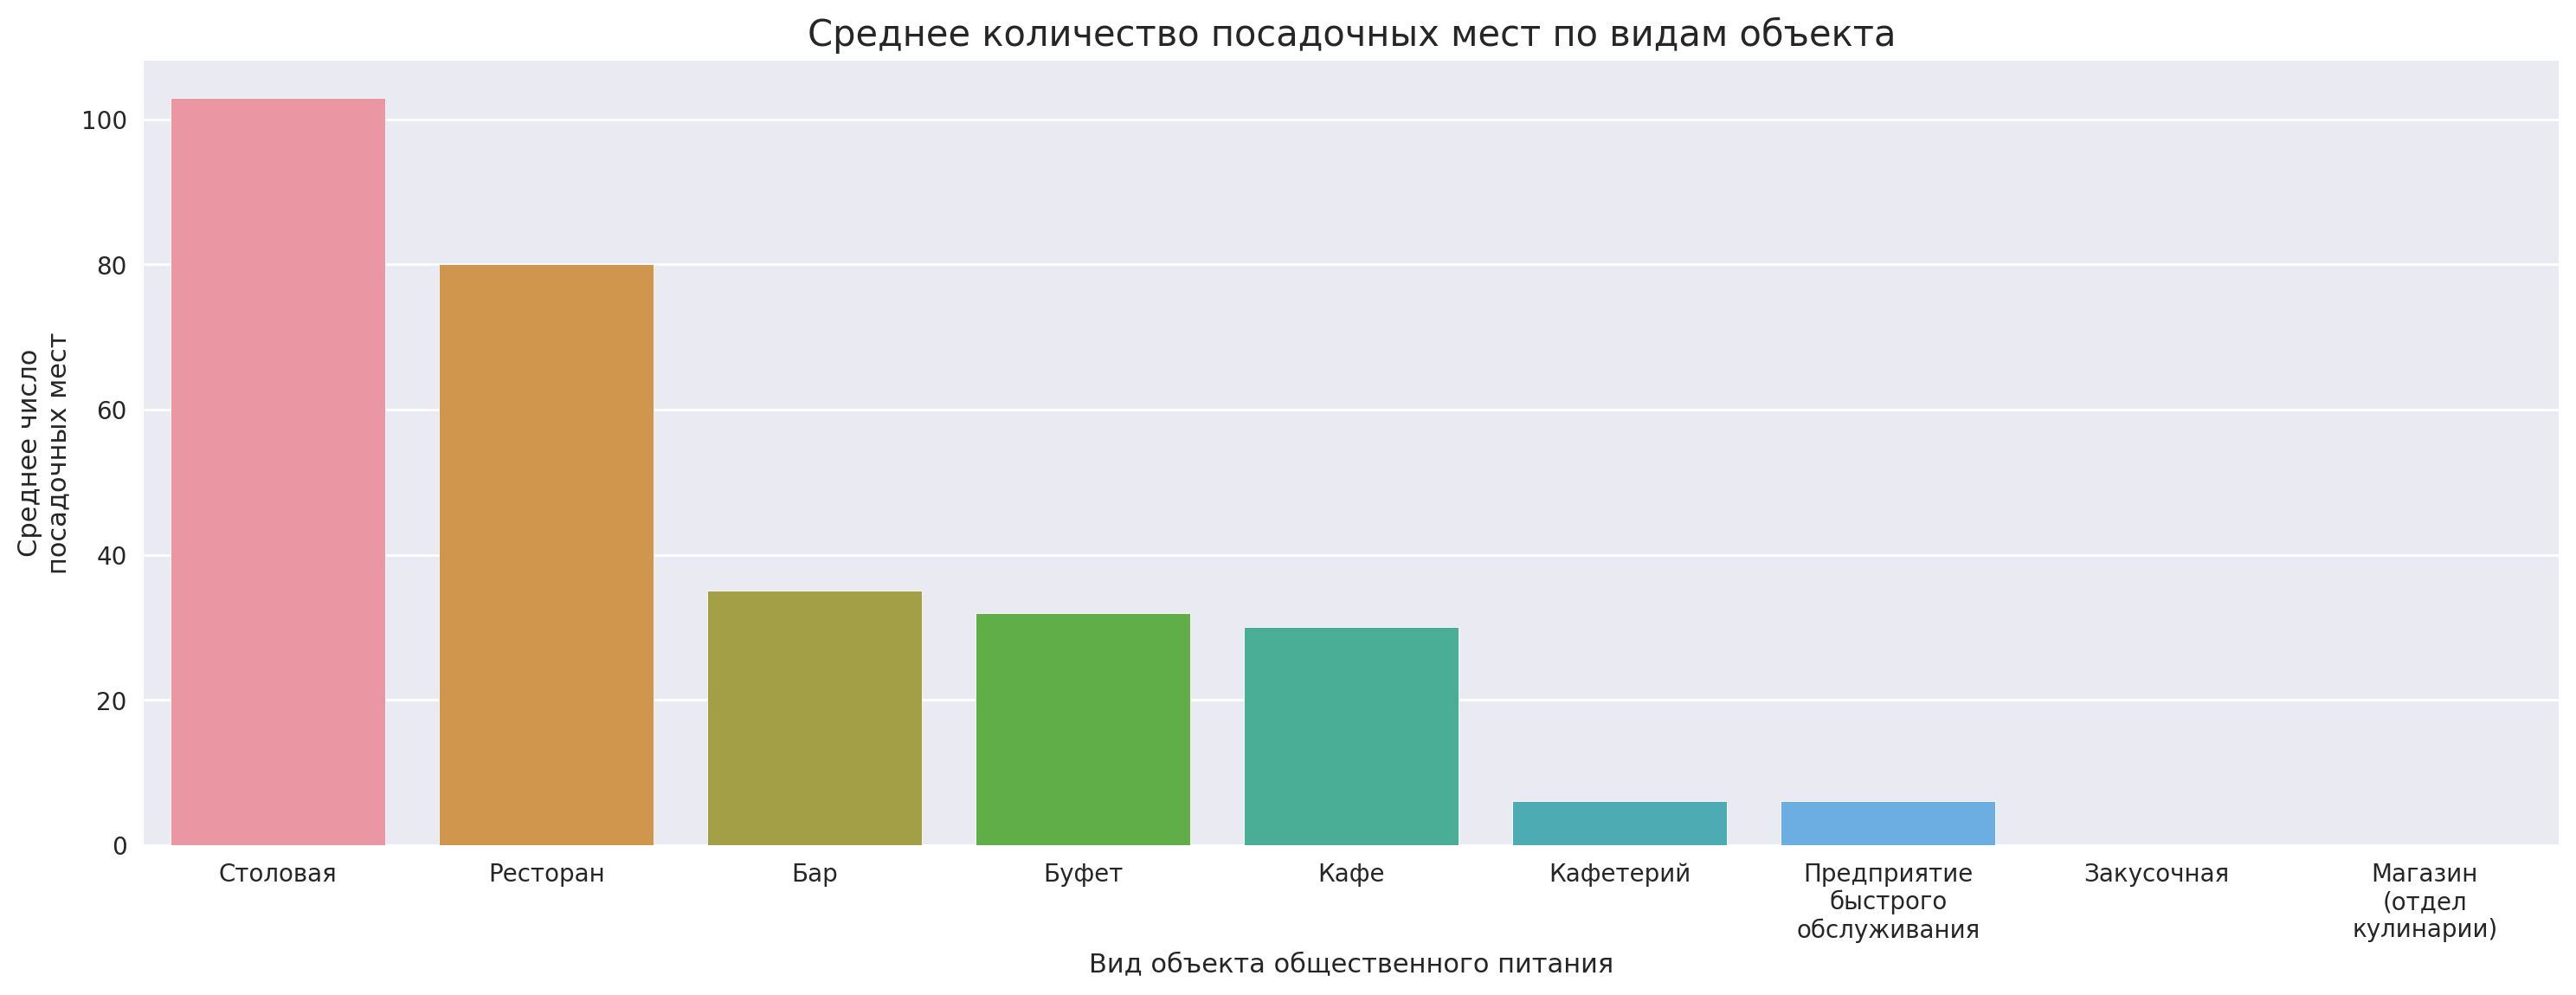

In [25]:
# построение графика
plt.figure(figsize=(18,6))
with plt.style.context('seaborn'):
    sns.barplot(x='object_type', y='number', data=rest_data.groupby('object_type')['number'].agg('median').sort_values(ascending=False).reset_index())

plt.title('Среднее количество посадочных мест по видам объекта', fontsize=15)
plt.xlabel('Вид объекта общественного питания')
plt.ylabel('Среднее число\nпосадочных мест')
plt.show()

Наибольшее количество посадочных мест наблюдается у столовых, затем идут рестораны, буфеты, бары и кафе. А у кафетериев, закусочных, предприятий быстрого обслуживания и отделов кулинарии посадочных мест мало.

### Выделение информации об улице

In [26]:
street_types = ['улица', 'аллея', 'бульвар', 'линия', 'набережная', 
                'переулок', 'просека', 'проспект', 'тупик', 'шоссе',
               'площадь', 'проезд']

# определим функцию street_names, которая извлекает названия улиц из адресов
def street_names(x, street_types):
    # исходный адрес приведем к нижнему регистру и разделим в список по разделителю ','
    address_list = x.split(',')
    # если в элементе списка встречается значение из street_types, то этот элемент считаем названием улицы
    # иначе названием улицы будет 2 элемент из списка address_list
    for type_street in street_types:
        for part in address_list:
            if type_street in part:
                return part
    return address_list[1]
# в датафрейм rest_data в столбец street запишем названия улиц, применив функцию street_names
rest_data['street'] = rest_data['address'].apply(lambda x: street_names(x, street_types)).str.strip()

In [27]:
rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,Кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,Кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,Кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,Кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,Кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15276,208537,шоколадница,да,Кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15277,209264,шоколадница,да,Кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15278,209186,шоколадница,да,Кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15279,221900,шоколадница,да,Кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


### Топ-10 улиц по количеству объектов

In [28]:
# сформируем сводную таблицу
streets = rest_data.groupby('street').agg({'id': 'count'}) \
                       .sort_values(by='id', ascending=False).reset_index()
streets.head(15)

,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,172
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,город Зеленоград,131
7,проспект Вернадского,128
8,Кутузовский проспект,114
9,Каширское шоссе,111


В список улиц попал город Зеленоград. Исключим его из топ-10.

In [29]:
# создадим таблицу, в которую занесем улицы с наибольшим количеством заведений
street_top = streets.head(11).drop(index=6).reset_index(drop=True)
street_top

,street,id
0,проспект Мира,203
1,Профсоюзная улица,182
2,Ленинградский проспект,172
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


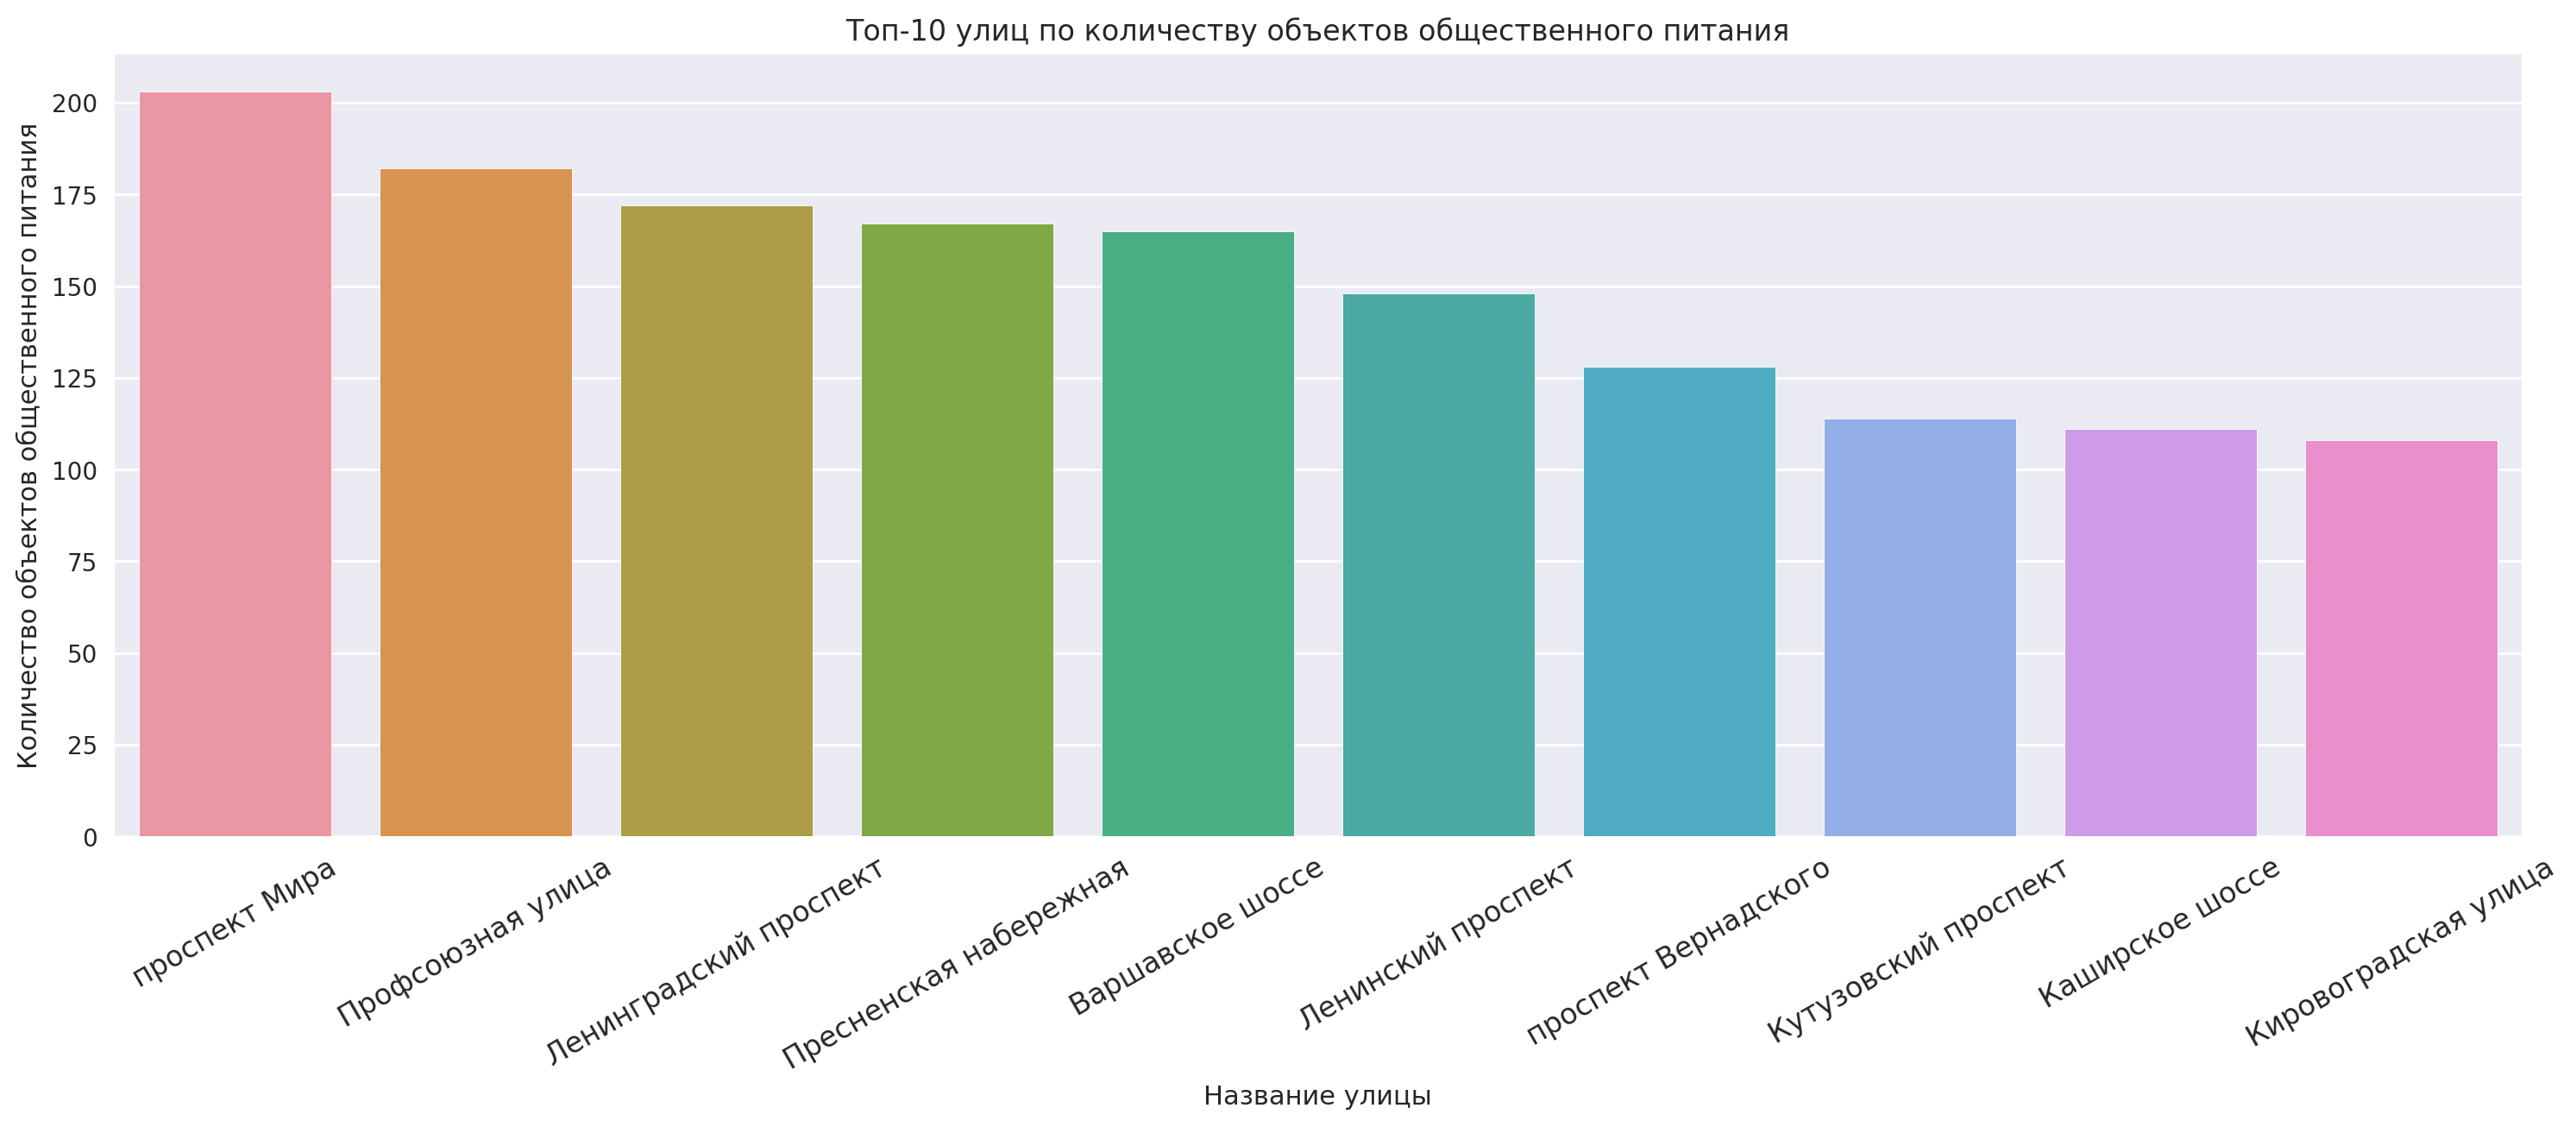

In [30]:
# построение графика
plt.figure(figsize=(18,6))

with plt.style.context('seaborn'):
    sns.barplot(x=street_top.street, y=street_top.id, data=street_top) 

plt.ylabel('Количество объектов общественного питания')
plt.xlabel('Название улицы')
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.tick_params(axis='x', labelsize=12)
plt.xticks(rotation=30)
plt.show()

In [31]:
url_id = '1PlhhVLK4BYKzYyNhcW9UkEkiTpNkjZDysTuxssXTVus'

In [32]:
# чтение файла
district = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{url_id}/export?format=csv')
district.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [33]:
# проверим на дубликаты
district.duplicated().sum()

8

In [34]:
# удалим дубликаты
district = district.drop_duplicates()

In [35]:
# проверим, что дубликатов не осталось
district.duplicated().sum()

0

In [36]:
# удаление ненужного столбца
district = district.drop(columns='areaid')

In [37]:
# переименуем столбцы
district.columns = ['street', 'okrug', 'area']

In [38]:
# объединеним данные по улицам, находящихся в нескольких районах
areas = district.groupby(['street'])['area'].apply(lambda text: ''.join(text.to_string(index=False))).\
                str.replace('(\\n)', ',').reset_index()
# объединение данные по топ-10 улицам и районам
street_top = street_top.merge(areas, on='street', how='left')

street_top

/tmp/ipykernel_96/1829312789.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  areas = district.groupby(['street'])['area'].apply(lambda text: ''.join(text.to_string(index=False))).\


,street,id,area
0,проспект Мира,203,"Алексеевский район, Ярославский Район,Район Ма..."
1,Профсоюзная улица,182,"Академический район, Район Черемушки, ..."
2,Ленинградский проспект,172,"Район Аэропорт, Район Беговой,Хорошевски..."
3,Пресненская набережная,167,Пресненский район
4,Варшавское шоссе,165,"Район Чертаново Центральное, Район Чертаново..."
5,Ленинский проспект,148,"Район Проспект Вернадского, Район Тропарево-Н..."
6,проспект Вернадского,128,"Район Проспект Вернадского, Район ..."
7,Кутузовский проспект,114,"Район Дорогомилово,Район Фили-Давыдково"
8,Каширское шоссе,111,"Район Москворечье-Сабурово, Район Н..."
9,Кировоградская улица,108,"Район Чертаново Центральное, Район Чертаново..."


Как видно, почти все улицы, которые представлены в топ-10, расположены сразу в нескольких районах, то есть являются очень длинными улицами. Исключение - Пресненская набережная, ее длина всего лишь 500 метров, однако на этой улице находится множество торговых центров, потому количество заведений тут так высоко.

Просмотрим, в каких районах находится наибольшее количество заведений.

In [39]:
street_top2 = streets.merge(areas, on='street', how='left').fillna(',')
street_top2 = street_top2[street_top2['area'].str.contains(',')==False]
street_top2.head(10)

,street,id,area
3,Пресненская набережная,167,Пресненский район
11,Ходынский бульвар,102,Хорошевский район
14,улица Новый Арбат,92,Район Арбат
15,улица Ленинская Слобода,89,Даниловский район
17,Пятницкая улица,80,Район Замоскворечье
22,улица Покровка,77,Басманный район
23,улица Арбат,77,Район Арбат
27,Тверская улица,68,Тверской район
28,Автозаводская улица,67,Даниловский район
29,Ярославское шоссе,65,Ярославский Район


Большая часть этих улиц находится в центре Москвы, в пределах Садового кольца.

In [40]:
# объединеним данные с районами
streets = streets.merge(areas, on='street', how='left')
# посчитаем количество заведений по районам
streets.groupby(['area'])['id'].agg('sum').sort_values(ascending=False).reset_index().head(15)

,area,id
0,Пресненский район,546
1,Тверской район,506
2,Басманный район,427
3,Даниловский район,296
4,Район Хамовники,295
5,Район Замоскворечье,285
6,Таганский район,274
7,Район Арбат,223
8,"Алексеевский район, Ярославский Район,Район Ма...",203
9,"Академический район, Район Черемушки, ...",182


In [41]:
data_demo = streets.groupby(['area'])['id'].agg('sum').sort_values(ascending=False).reset_index().head(10)
data_demo['area'] = data_demo['area'].str.split(',').explode('area')
data_demo.groupby('area')['id'].sum().sort_values()

area
 Ярославский Район     182
Алексеевский район     203
Район Арбат            223
Таганский район        274
Район Замоскворечье    285
Район Хамовники        295
Даниловский район      296
Басманный район        427
Тверской район         506
Пресненский район      546
Name: id, dtype: int64

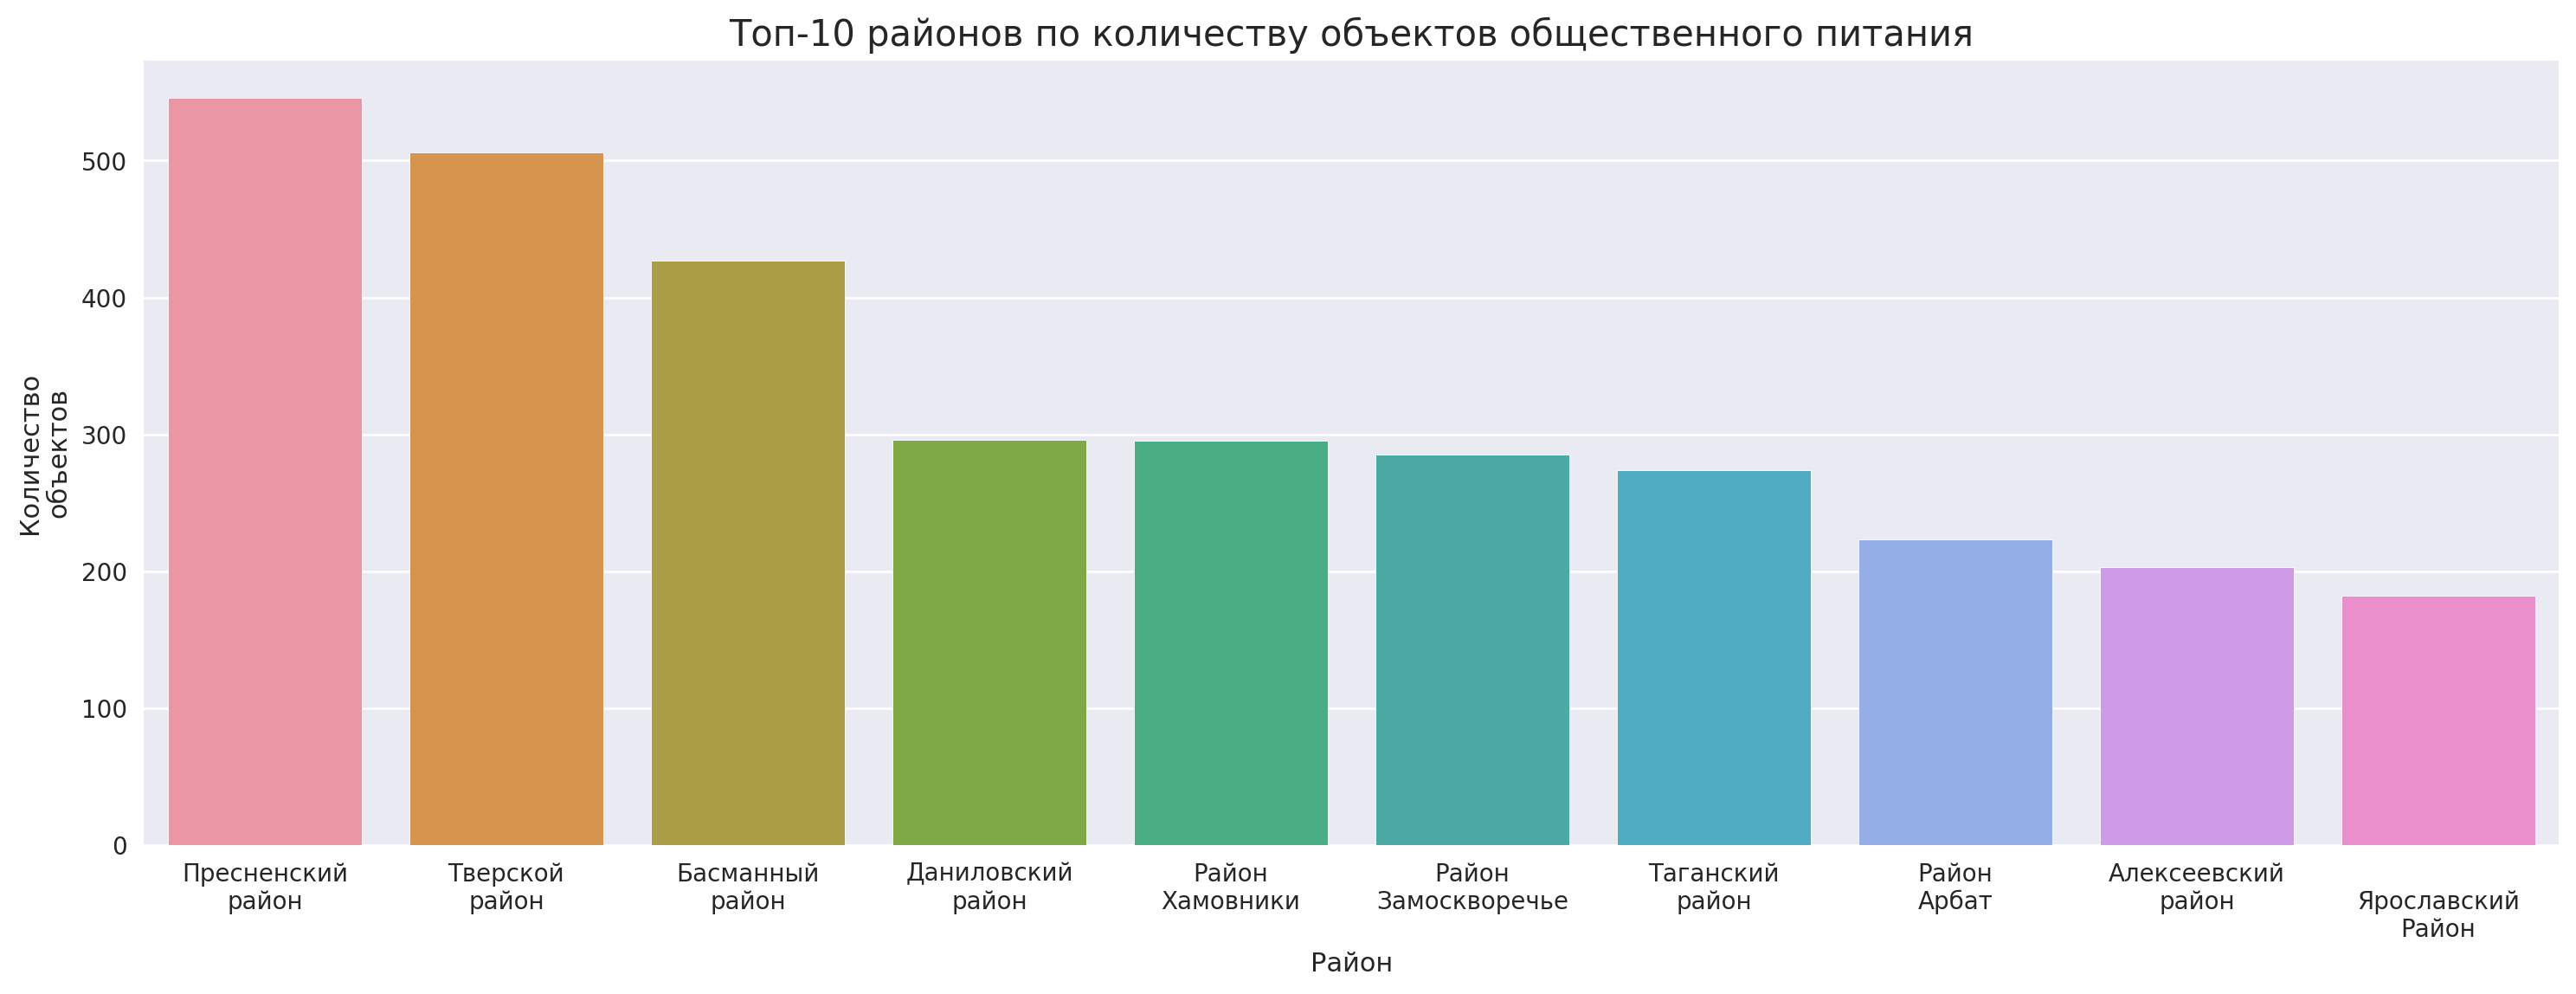

In [42]:
# создание таблицы с топ-10 районов
areas_top = data_demo
#streets.groupby(['area'])['id'].agg('sum').sort_values(ascending=False).reset_index().loc[[0,1,2,3,4,5,6,7,12,14]]

# построение графика
plt.figure(figsize=(18,6))
with plt.style.context('seaborn'):
    sns.barplot(x='area', y='id', data=areas_top)
    
plt.xticks(np.arange(10),[x.replace(' ', '\n') for x in areas_top['area']])

plt.title('Топ-10 районов по количеству объектов общественного питания', fontsize=15)
plt.xlabel('Район')
plt.ylabel('Количество\nобъектов')
plt.show()

Больше всего заведений находится в центральных районах Москвы.

### Улицы с одним объектом

In [43]:
# посмотрим на улицы с одним объектом
streets_1 = streets[streets['id'] == 1]
print('Число улиц с одним объектом общественного питания: ', len(streets_1))
streets_1.head()

Число улиц с одним объектом общественного питания:  569


,street,id,area
1380,улица Знаменские Садки,1,Район Северное Бутово
1381,42-й километр Московской Кольцевой Автодороги,1,NaN
1382,улица Захарьинские Дворики,1,Район Южное Бутово
1383,Астрадамский проезд,1,Тимирязевский Район
1384,8-я улица Соколиной Горы,1,"Район Измайлово,Район Соколиная Гора"


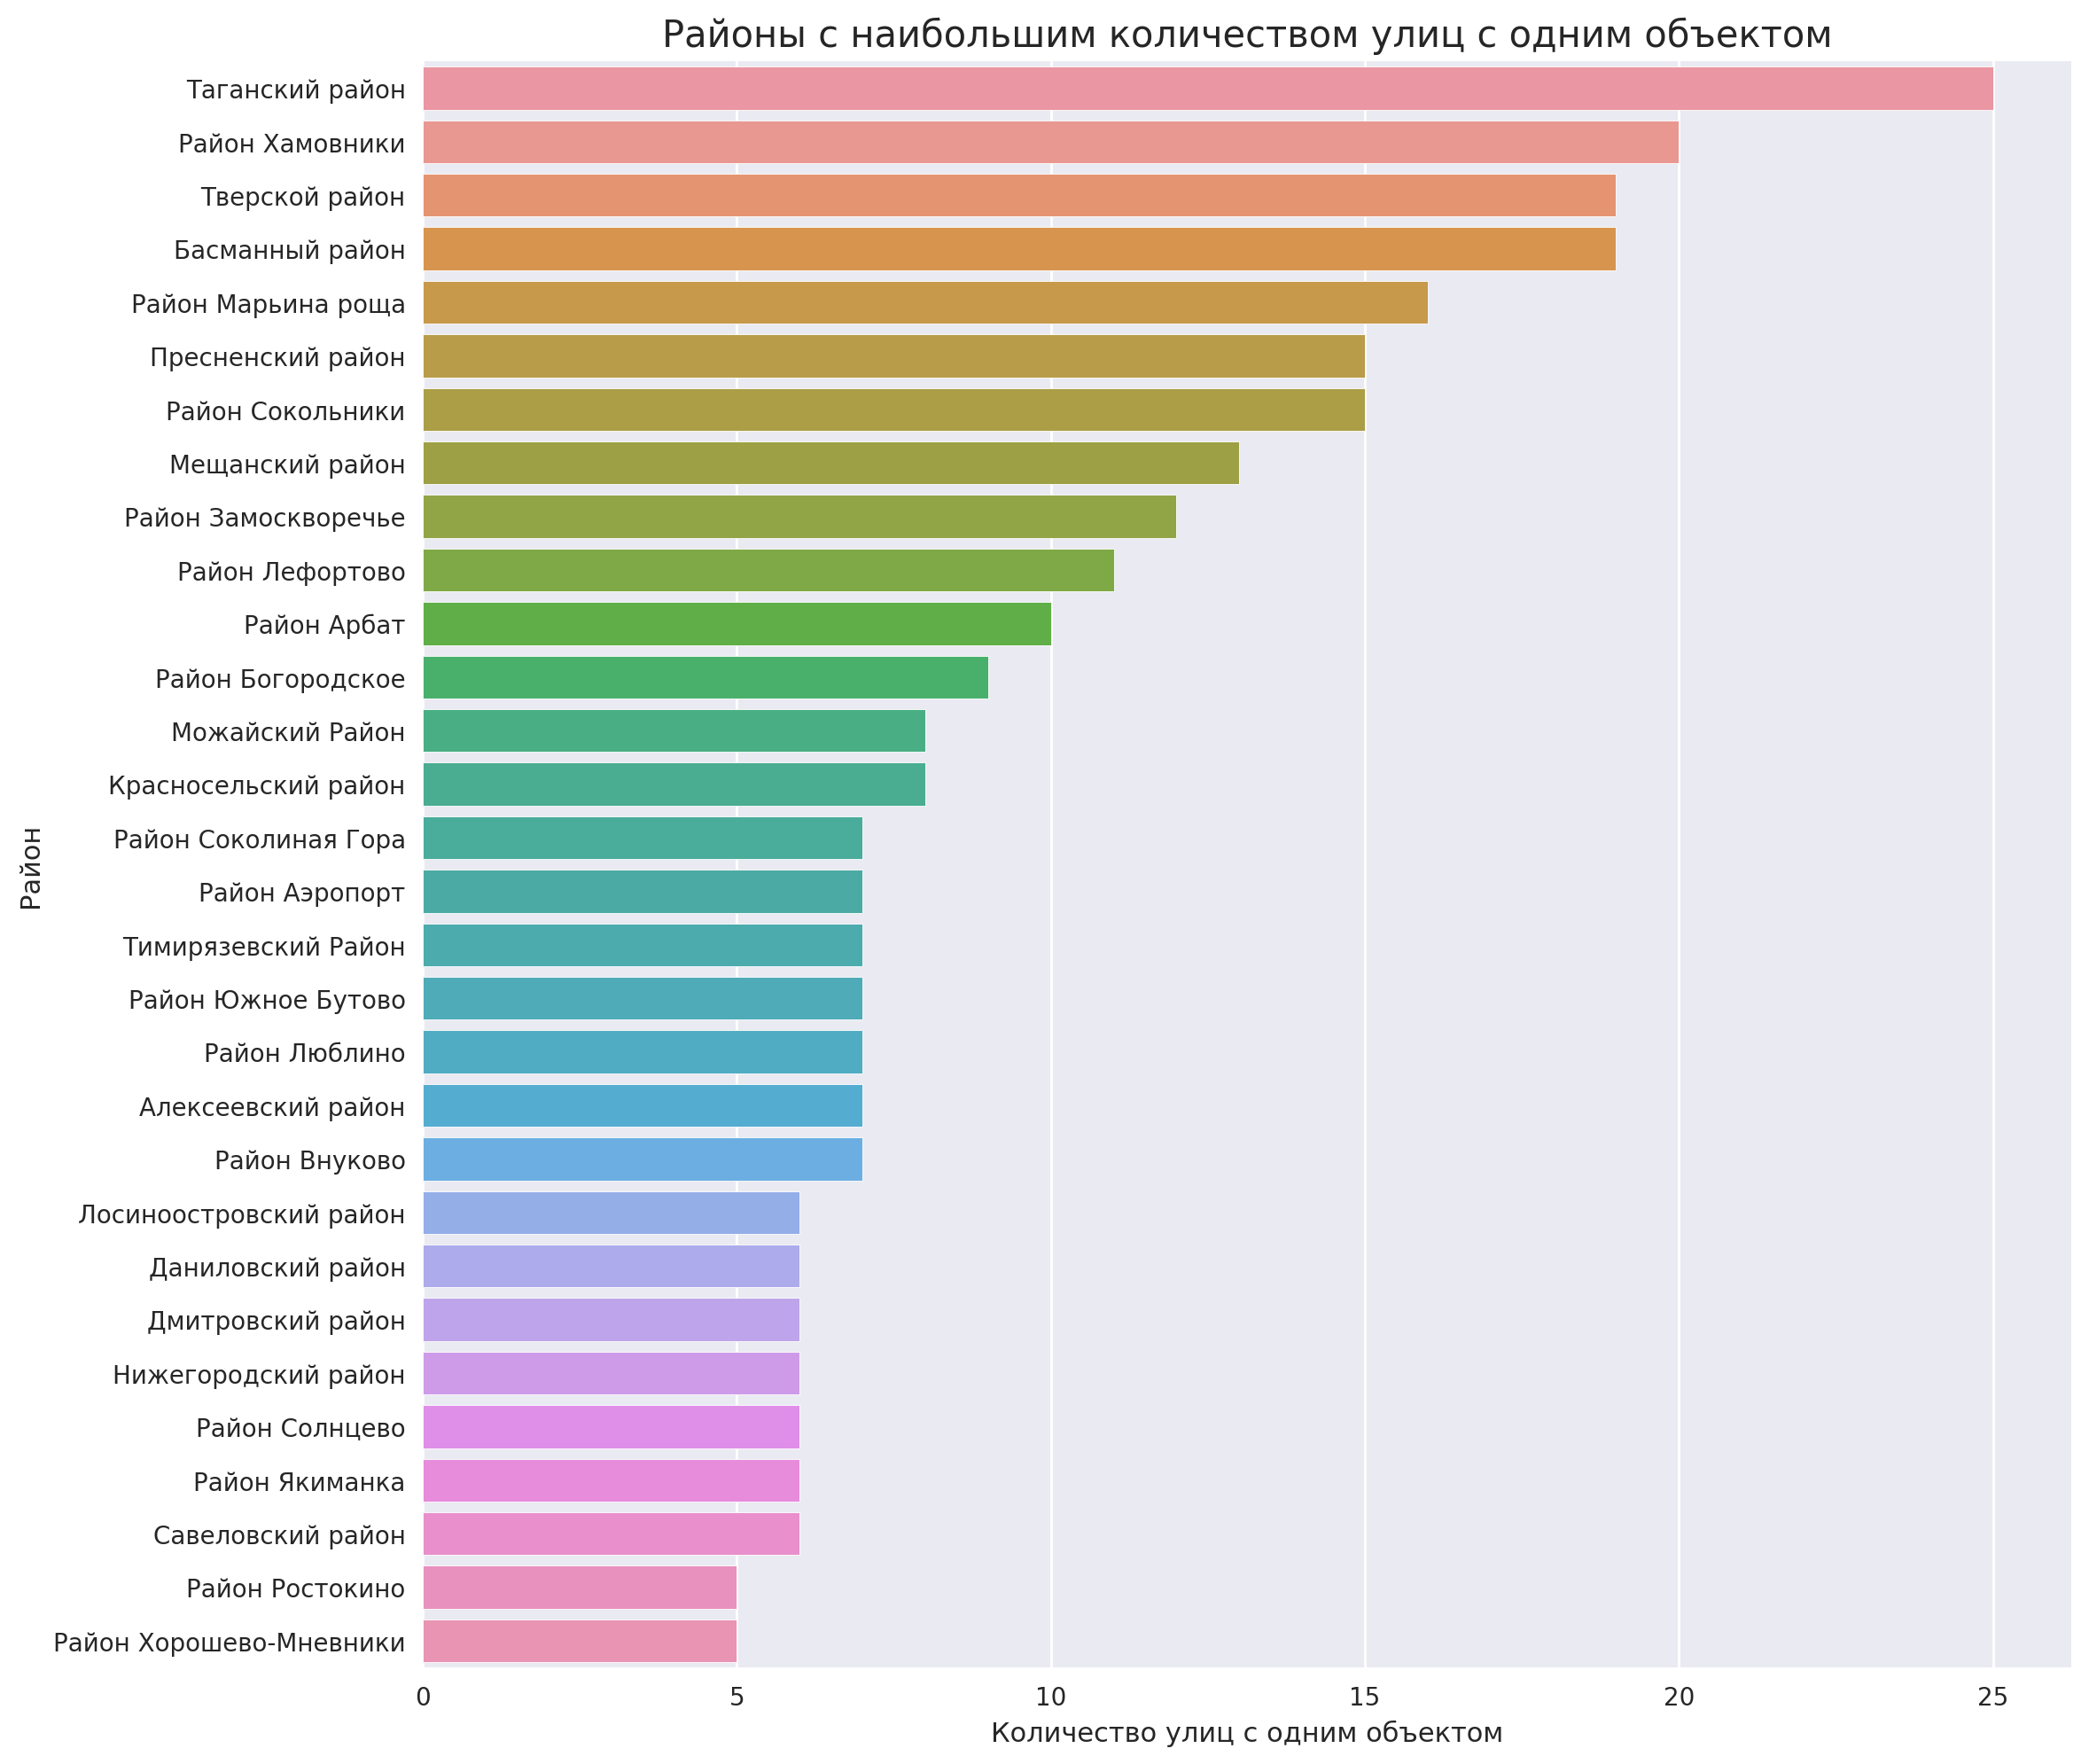

In [44]:
# пострение графика
plt.figure(figsize=(12,12))
sns.set_color_codes('pastel')
with plt.style.context('seaborn'):
    sns.barplot(y='area', x='id', orient="h", data=streets_1.groupby('area')['id'].agg('count').sort_values(ascending=False).head(30).reset_index())
plt.title('Районы с наибольшим количеством улиц с одним объектом', fontsize=15)
plt.ylabel('Район')
plt.xlabel('Количество улиц с одним объектом')
plt.show()

Большего всего улиц с одним заведением находится также в центре Москвы! Как мы уже выяснили, в центральных районах столицы в принципе больше всего заведений, однако, помимо этого, именно в этих районах довольно много коротких улиц.

## Результаты исследования

На основе проведенного анализа можно сделать следующие выводы:

- Наиболее популярные виды объекта - кафе. Далее идут столовые, рестораны и предприятия быстрого обслуживания. Кафе занимает 40% от общего числа объектов.
- Только 20% заведений являются сетевыми. Причем сетевое распространеие более характерно для предприятий быстрого обслуживания: около 40% заведений данного типа сетевые.
- Для сетевых заведений характерно небольшое количество посадочных мест, то есть сетевые заведения ориентированы на приготовление еды на вынос и/или доставку.
- По количеству посадочных мест лидируют столовые и рестораны.
- Наибольшее количество заведений расположено на длинных улицах, которые проходят через несколько районов.
- Больше всего заведений в центральных районах города.

Согласно этим выводам, рекомендации по открытию кафе следующие:

Лучше всего подойдут центральные районы Москвы - именно здесь находится большая часть заведений, следовательно, сюда приходят/приезжают люди, если собираются поесть. Большое количество заведений на, например, Пресненской набережной показывает о высокой проходимости, однако также о высокой конкуренции. Однако, учитывая наличия у кафе своей "фишки" в виде роботов, люди наверняка зайдут посмотреть, что это за чудеса такие, потому открыть кафе на этой улице (или на другой улице с большой плотностью заведений общественного питания) будет разумно.

Ссылка на презентацию: https://drive.google.com/file/d/1pUE__Wp1rJ_pv6iDI11sOiXcN_9m5Loj/view?usp=sharing